In [1]:
#importing some libraries
import pandas as pd
import matplotlib as plt
import seaborn as sns
%matplotlib inline
from pmdarima import auto_arima
import warnings
warnings.filterwarnings("ignore")

In [3]:
#reading for data
data_time = pd.read_csv("Births2015.csv", index_col='date', parse_dates= True)
data_time
#r:- It converts a normal string to a raw string
#parse_data is used for change in date format // to --
#squeeze is used for change data type as pandas.core.frame.DataFrame to pandas.core.series.Series

,Unnamed: 0,births,wday,year,month,day_of_year,day_of_month,day_of_week
date,,,,,,,,
2015-01-01,1,8068,Thu,2015,1,1,1,5
2015-01-02,2,10850,Fri,2015,1,2,2,6
2015-01-03,3,8328,Sat,2015,1,3,3,7
2015-01-04,4,7065,Sun,2015,1,4,4,1
2015-01-05,5,11892,Mon,2015,1,5,5,2
...,...,...,...,...,...,...,...,...
2015-12-27,361,7518,Sun,2015,12,361,27,1
2015-12-28,362,13100,Mon,2015,12,362,28,2
2015-12-29,363,13458,Tue,2015,12,363,29,3


In [4]:
data_time = data_time.drop(['Unnamed: 0', 'wday', 'year',	'month',	'day_of_year',	'day_of_month',	'day_of_week'], axis=1)

In [6]:
data_time.head()

,births
date,
2015-01-01,8068
2015-01-02,10850
2015-01-03,8328
2015-01-04,7065
2015-01-05,11892


In [9]:
#time series algorithm required array values
series_value = data_time.values
series_value

array([[ 8068],
       [10850],
       [ 8328],
       [ 7065],
       [11892],
       [12425],
       [12141],
       [12094],
       [11868],
       [ 8014],
       [ 7172],
       [11479],
       [11924],
       [12013],
       [12339],
       [11861],
       [ 8280],
       [ 7195],
       [10602],
       [12242],
       [12086],
       [11949],
       [11910],
       [ 8235],
       [ 7186],
       [11728],
       [11882],
       [11602],
       [11967],
       [11571],
       [ 7987],
       [ 7139],
       [11480],
       [12079],
       [11924],
       [11821],
       [11656],
       [ 8285],
       [ 7265],
       [11937],
       [12291],
       [11911],
       [12285],
       [11321],
       [ 8390],
       [ 7508],
       [11038],
       [11952],
       [12061],
       [11968],
       [11864],
       [ 8343],
       [ 7254],
       [11260],
       [11941],
       [11828],
       [11672],
       [11596],
       [ 7989],
       [ 7273],
       [11609],
       [12402],
       [

In [10]:
type(series_value)

numpy.ndarray

In [11]:
data_time.size

365

In [12]:
data_time.describe()

,births
count,365.000000
mean,10899.991781
std,2076.683881
min,6515.000000
25%,8431.000000
50%,11883.000000
75%,12339.000000
max,13949.000000


<AxesSubplot: xlabel='date'>

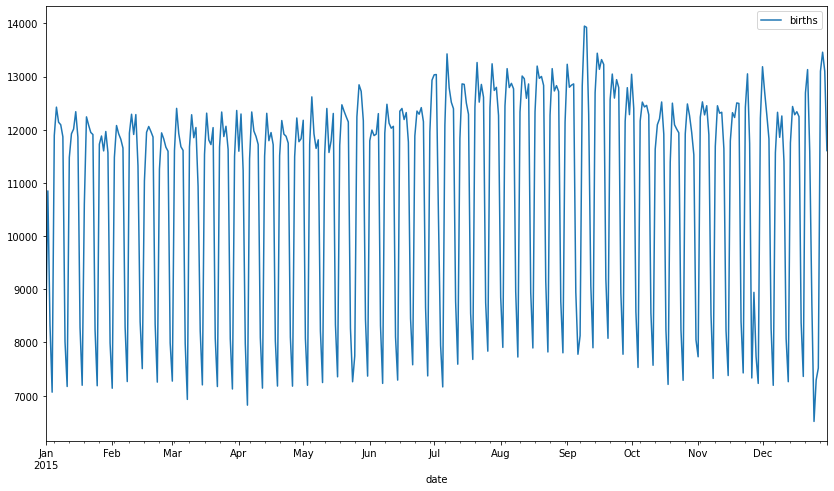

In [15]:
import networkx as nx
import matplotlib.pyplot as plt
data_time.plot(figsize=(14,8))

<AxesSubplot: xlabel='date'>

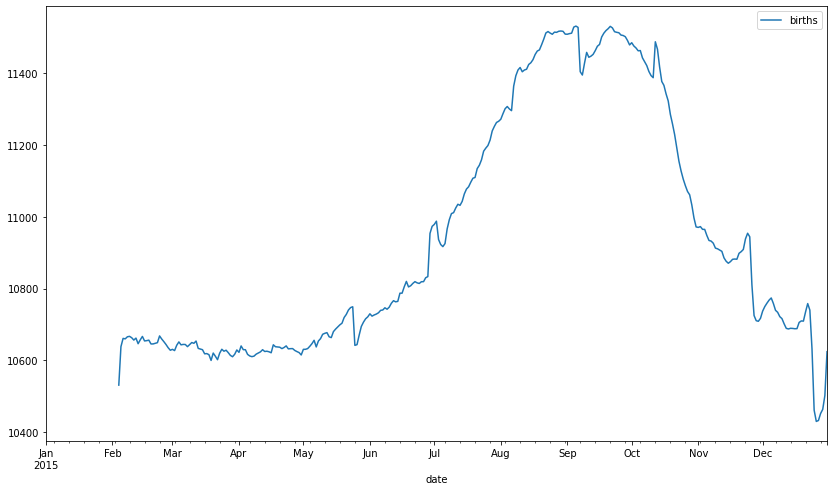

In [20]:
#stationary things is imp in time series, indicates that crack factor and like a constant d
#rolling is perticular time period 
data_time_mean = data_time.rolling(window = 35).mean()
data_time_mean.plot(figsize=(14,8))

Baseline model

In [23]:
#baseline model, autorequested, ARIMA model, seasonal ARIMA model
#previous order is same like future assumption, baseline model depends upon historical data
#ex: yesterday's stock price will be next day stock price (t+1)
value = pd.DataFrame(series_value)
birth_df = pd.concat([value, value.shift(1)], axis=1)
birth_df.head()

,0,0
0,8068,NaN
1,10850,8068.0
2,8328,10850.0
3,7065,8328.0
4,11892,7065.0


In [24]:
birth_df.columns = ['Actual_birth', 'Forecast_birth']
birth_df.head()

,Actual_birth,Forecast_birth
0,8068,NaN
1,10850,8068.0
2,8328,10850.0
3,7065,8328.0
4,11892,7065.0


In [25]:
from sklearn.metrics import mean_squared_error 
import numpy as np 

In [26]:
birth_test = birth_df[1:]
birth_test.head()


,Actual_birth,Forecast_birth
1,10850,8068.0
2,8328,10850.0
3,7065,8328.0
4,11892,7065.0
5,12425,11892.0


In [27]:
birth_error = mean_squared_error(birth_test.Actual_birth, birth_test.Forecast_birth)
birth_error

5162403.576923077

In [28]:
np.sqrt(birth_error)

2272.092334594498

ARIMA means “autoregressive integrated moving average.”
ARIMA is to measure events that happen over a period of time. The model is used to understand past data or predict future data in a series

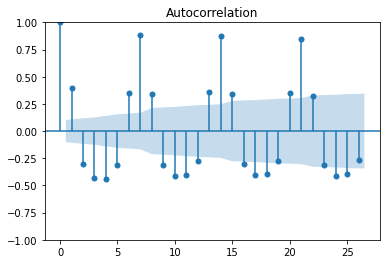

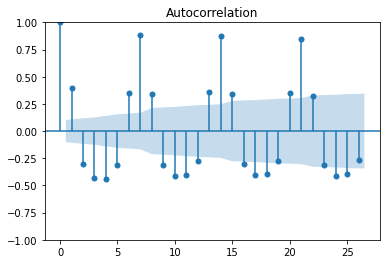

In [29]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
plot_acf(data_time) # to find value of q

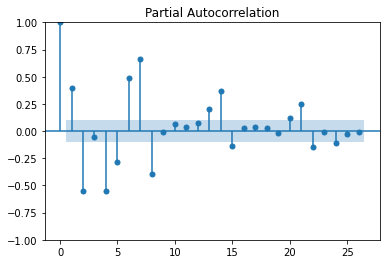

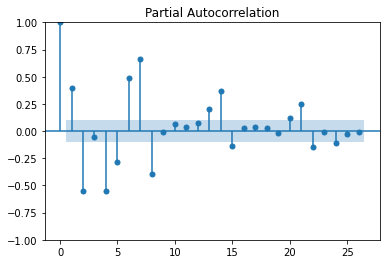

In [30]:
plot_pacf(data_time) # to find value of p

Here we can see that the first lag is significantly out of the limit and the second one is also out of the significant limit but it is not that far so we can select the order of the p as 1. 

"ARIMA(p,d,q)" model, where: p is the number of autoregressive terms, d is the number of nonseasonal differences needed for stationarity, and. q is the number of lagged forecast errors in the prediction equation.

In [31]:
#Augmented Dickey-Fuller test 
from statsmodels.tsa.stattools import adfuller
result = adfuller(data_time.iloc[:])
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('No of lags: %f' % result[2])
print('Critical Values:')
for key, value in result[4].items():
  print('\t%s: %.3f' % (key, value))

ADF Statistic: -1.601399
p-value: 0.482890
No of lags: 14.000000
Critical Values:
	1%: -3.449
	5%: -2.870
	10%: -2.571


Here we can see that the p-value is more than 0.05 this means our null hypothesis will be rejected and we will take this series as non-stationary. Let’s make a plot of this data 

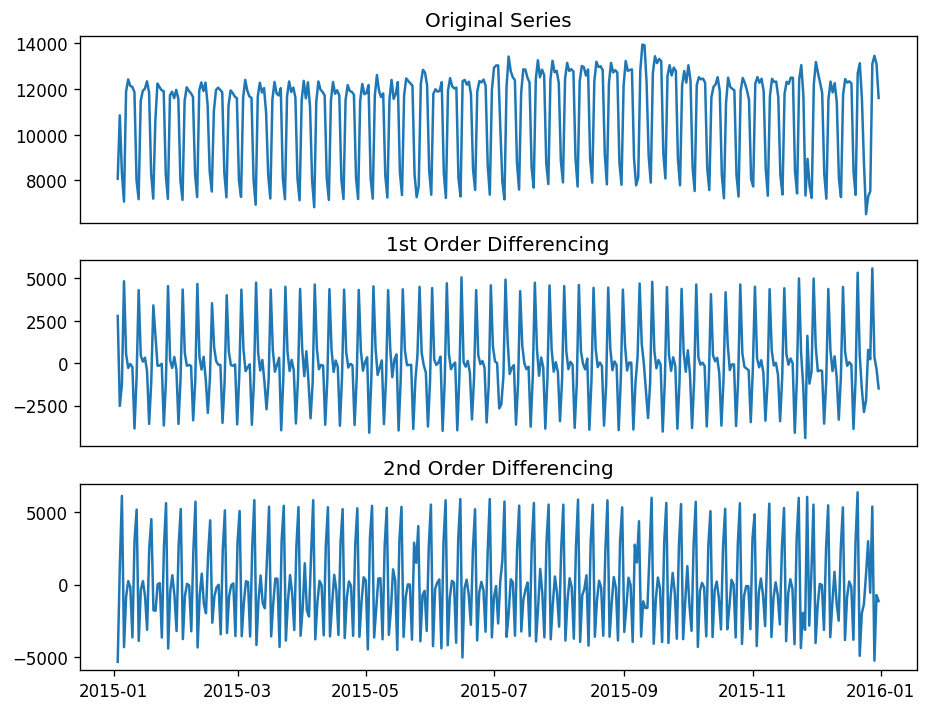

In [32]:
#finding d value
import numpy as np, pandas as pd
import matplotlib.pyplot as plt
plt.rcParams.update({'figure.figsize':(9,7), 'figure.dpi':120})
 
# Original Series
fig, (ax1, ax2, ax3) = plt.subplots(3)
ax1.plot(data_time.iloc[:]); ax1.set_title('Original Series'); ax1.axes.xaxis.set_visible(False)
# 1st Differencing
ax2.plot(data_time.iloc[:].diff()); ax2.set_title('1st Order Differencing'); ax2.axes.xaxis.set_visible(False)
# 2nd Differencing
ax3.plot(data_time.iloc[:].diff().diff()); ax3.set_title('2nd Order Differencing')
plt.show()


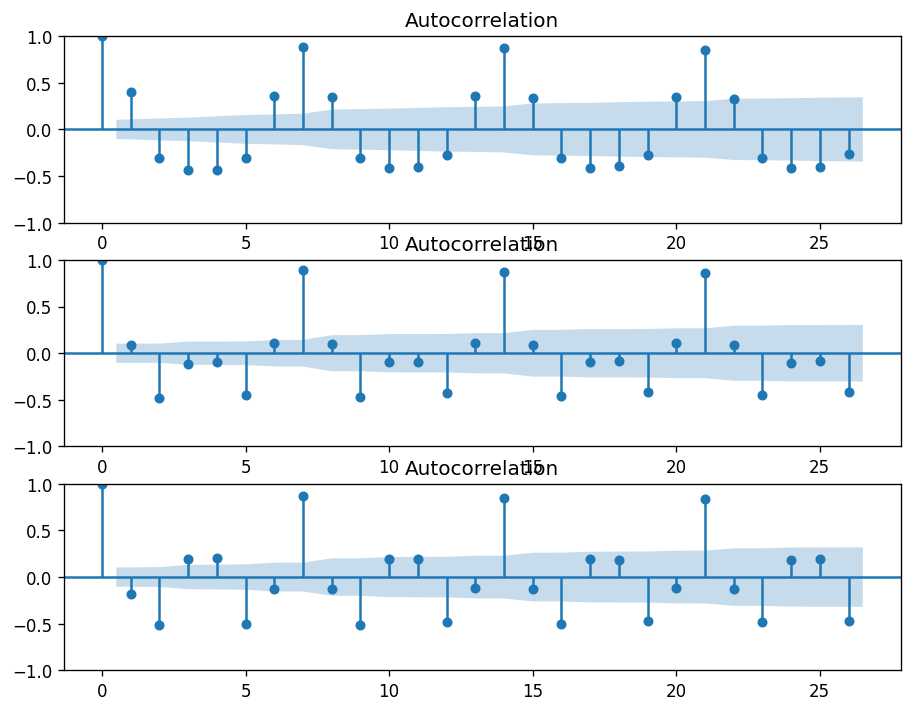

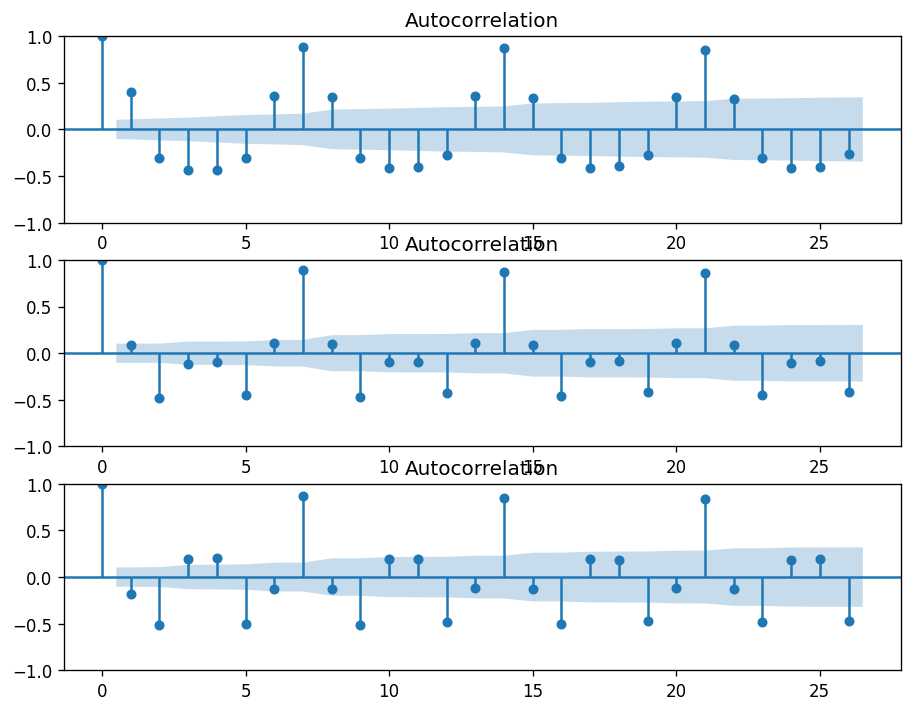

In [33]:
from statsmodels.graphics.tsaplots import plot_acf
fig, (ax1, ax2, ax3) = plt.subplots(3)
plot_acf(data_time.iloc[:], ax=ax1)
plot_acf(data_time.iloc[:].diff().dropna(), ax=ax2)
plot_acf(data_time.iloc[:].diff().diff().dropna(), ax=ax3)

Here we can see that in second-order differencing the immediate lag has gone on the negative side, representing that in the second-order the series has become over the difference.

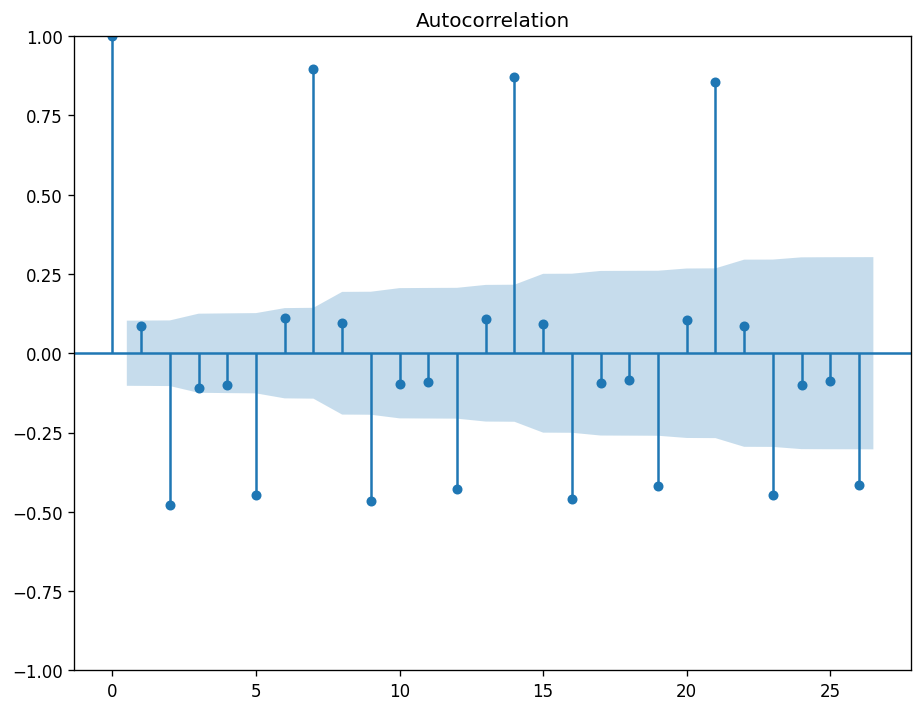

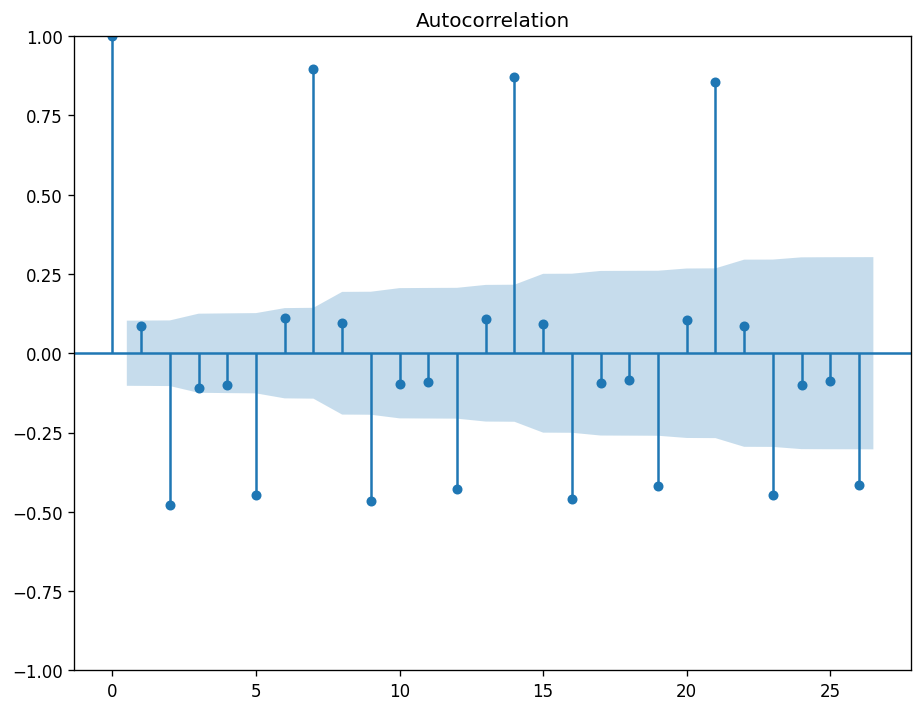

In [34]:
plot_acf(data_time.diff().dropna())

Here we can see that 2 of the lags are out of the significance limit so we can say that the optimal value of our q (MA) is 2.

## Building ARIMA model

from statsmodels.tsa.arima.model import ARIMA
model = ARIMA(data_time, order = (1,1,2))
model_fit = model.fit(disp=0)
model_fit.summary()

In [35]:
data_time.size
birth_train = data_time[0:330]
birth_test =  data_time[330:365]

In [37]:
from statsmodels.tsa.arima.model import ARIMA # replace _ to . if you are getting error
birth_model = ARIMA(birth_train, order = (1,1,2)) #(1,1,2)
birth_model_fit = birth_model.fit()

In [38]:
birth_model_fit.aic # Akaike information criterion (AIC) smaller is better

5819.0431159218915

In [51]:
from statsmodels.tsa.arima.model import ARIMA # replace _ to . if you are getting error
birth_model1 = ARIMA(birth_train, order = (3,0,16)) 
birth_model_fit1 = birth_model1.fit()

In [52]:
birth_model_fit1.aic # Akaike information criterion (AIC) smaller is better

5575.706886834161

In [53]:
birth_forecast = birth_model_fit1.forecast(steps = 35)
birth_forecast

2015-11-27    11060.946990
2015-11-28    10718.924916
2015-11-29     7765.739225
2015-11-30     9521.940833
2015-12-01    13414.566289
2015-12-02    14491.975199
2015-12-03     9491.528520
2015-12-04     9283.530729
2015-12-05    10049.017880
2015-12-06     8951.100246
2015-12-07     9363.977950
2015-12-08    11614.436915
2015-12-09    13971.276569
2015-12-10    11922.839458
2015-12-11    10074.082482
2015-12-12     9189.112433
2015-12-13     9332.060072
2015-12-14    10932.398903
2015-12-15    12291.504329
2015-12-16    12831.710580
2015-12-17    11748.700302
2015-12-18    10226.364521
2015-12-19     9082.162074
2015-12-20     9472.673430
2015-12-21    10828.809927
2015-12-22    12371.148913
2015-12-23    12718.415690
2015-12-24    11814.083274
2015-12-25    10161.950845
2015-12-26     9171.008946
2015-12-27     9435.439965
2015-12-28    10885.846448
2015-12-29    12305.513968
2015-12-30    12737.172111
2015-12-31    11760.459286
Freq: D, Name: predicted_mean, dtype: float64

In [54]:
birth_test

,births
date,
2015-11-27,8942
2015-11-28,7734
2015-11-29,7230
2015-11-30,12214
2015-12-01,13185
2015-12-02,12708
2015-12-03,12281
2015-12-04,11828
2015-12-05,8262


In [55]:
np.sqrt(mean_squared_error(birth_test, birth_forecast))

1806.0244797685236

In [56]:
birth_model_fit1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                 births   No. Observations:                  330
Model:                ARIMA(3, 0, 16)   Log Likelihood               -2766.853
Date:                Fri, 28 Oct 2022   AIC                           5575.707
Time:                        13:05:20   BIC                           5655.488
Sample:                    01-01-2015   HQIC                          5607.530
                         - 11-26-2015                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       1.093e+04    311.011     35.141      0.000    1.03e+04    1.15e+04
ar.L1          0.3390      0.574      0.590      0.555      -0.786       1.464
ar.L2          0.1302      0.711      0.183      0.855      -1.263       1.524
ar.L3         -0.9018      0.569     -1.584      0.113      -2.017       0.214
ma.L1         -0.1220      0.618     -0.197      0.843      -1.333       1.089
ma.L2         -0.5659      0.598     -0.947      0.344      -1.737       0.605
ma.L3          1.0029      0.341      2.941      0.003       0.335       1.671
ma.L4          0.6263      0.517      1.210      0.226      -0.388       1.641
ma.L5         -0.5315      0.383     -1.387      0.165      -1.282       0.219
ma.L6         -0.3749      0.502     -0.746      0.456      -1.360       0.610
ma.L7          1.0142      0.454      2.232      0.026       0.124       1.905
ma.L8          0.1474      0.640      0.230      0.818      -1.107       1.402
ma.L9         -0.7078      0.637     -1.111      0.267      -1.957       0.541
ma.L10         0.4144      0.468      0.886      0.376      -0.503       1.331
ma.L11         0.6080      0.520      1.170      0.242      -0.411       1.627
ma.L12        -0.0834      0.426     -0.196      0.845      -0.919       0.752
ma.L13        -0.3578      0.457     -0.782      0.434      -1.254       0.539
ma.L14         0.3369      0.352      0.956      0.339      -0.354       1.027
ma.L15         0.2270      0.330      0.688      0.492      -0.420       0.874
ma.L16        -0.2576      0.337     -0.763      0.445      -0.919       0.404
sigma2       2.31e+06      0.046   5.05e+07      0.000    2.31e+06    2.31e+06
===================================================================================
Ljung-Box (L1) (Q):                   0.24   Jarque-Bera (JB):               487.67
Prob(Q):                              0.63   Prob(JB):                         0.00
Heteroskedasticity (H):               1.43   Skew:                            -0.58
Prob(H) (two-sided):                  0.06   Kurtosis:                         8.84
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 7.86e+23. Standard errors may be unstable.
"""

<AxesSubplot: >

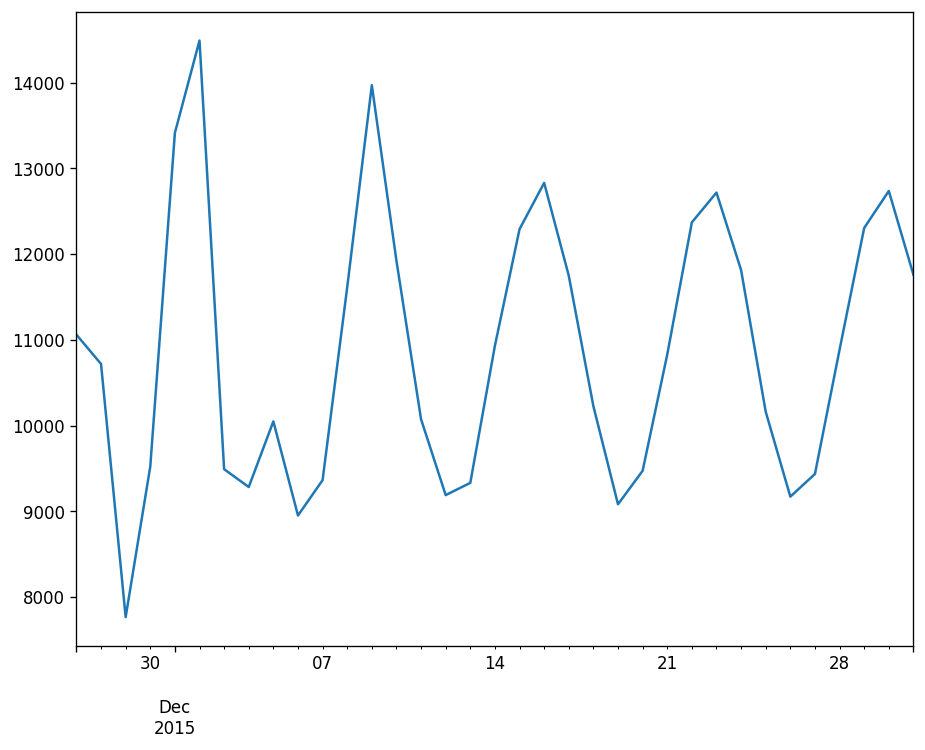

In [57]:
birth_forecast.plot()

In [59]:
birth_test = pd.DataFrame(birth_test)
birth_test['forecast'] =  birth_model_fit1.forecast(steps = 35)
birth_test.head()

,births,forecast
date,,
2015-11-27,8942,11060.946990
2015-11-28,7734,10718.924916
2015-11-29,7230,7765.739225
2015-11-30,12214,9521.940833
2015-12-01,13185,13414.566289


<AxesSubplot: xlabel='date'>

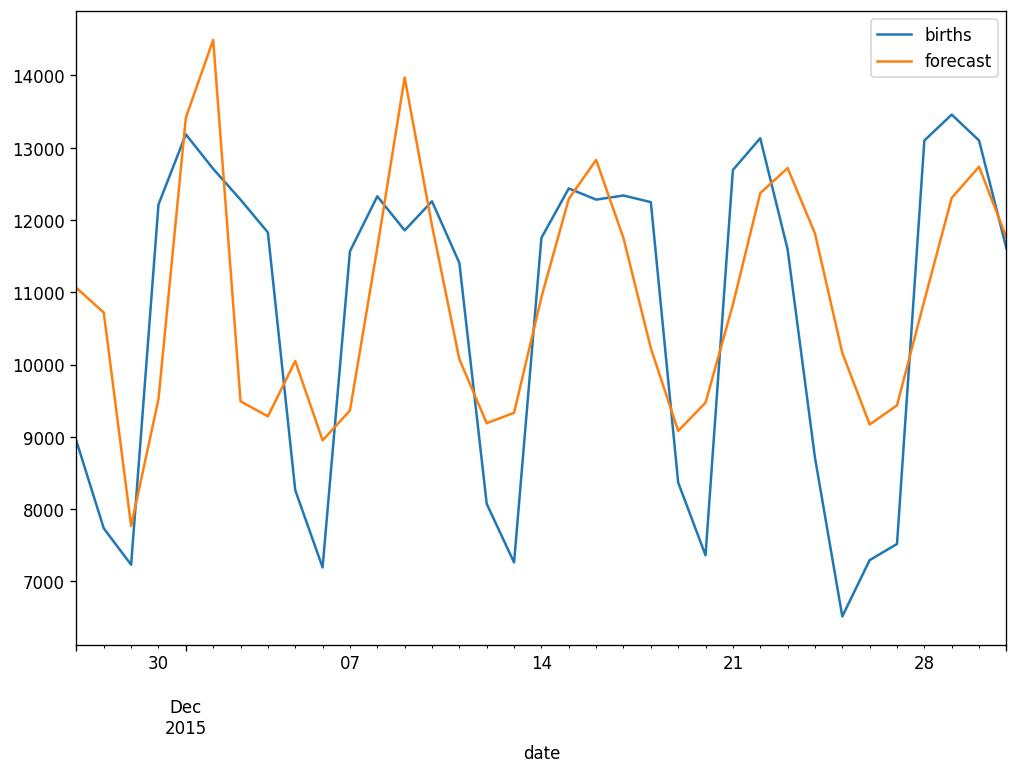

In [60]:
birth_test[['births','forecast']].plot(figsize = (10,7))

## Conclusion
we have discussed the process of finding the values of parameters in the ARIMA modelling. One thing that is also noticeable here is the AIC value that needs to be lower while performing the ARIMA modelling. We can reduce this term by changing the values of the q parameter. 

## Another way to find best p, d, and q values

In [46]:
from inspect import trace
stepwise_fit = auto_arima(data_time, trace =True , suppress_warnings= True)

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=1.06 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=6663.297, Time=0.05 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=6661.913, Time=0.11 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=6641.598, Time=0.09 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=6661.305, Time=0.03 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=6610.802, Time=0.34 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=6435.324, Time=0.87 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=6561.448, Time=0.10 sec
 ARIMA(3,1,1)(0,0,0)[0] intercept   : AIC=6557.321, Time=0.47 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.58 sec
 ARIMA(3,1,0)(0,0,0)[0] intercept   : AIC=6563.450, Time=0.16 sec
 ARIMA(3,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=1.14 sec
 ARIMA(2,1,1)(0,0,0)[0]             : AIC=inf, Time=0.41 sec

Best model:  ARIMA(2,1,1)(0,0,0)[0] intercept
Total fit time: 5.675 seconds


In [47]:
data_time.size
train = data_time[0:330]
test =  data_time[330:365]
print(train.shape, test.shape)

(330, 1) (35, 1)


In [48]:
from statsmodels.tsa.arima.model import ARIMA
model = ARIMA(data_time, order = (2,1,1))
model = model.fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                 births   No. Observations:                  365
Model:                 ARIMA(2, 1, 1)   Log Likelihood               -3208.419
Date:                Fri, 28 Oct 2022   AIC                           6424.838
Time:                        13:01:35   BIC                           6440.426
Sample:                    01-01-2015   HQIC                          6431.034
                         - 12-31-2015                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.6347      0.063     10.047      0.000       0.511       0.759
ar.L2         -0.5441      0.068     -8.035      0.000      -0.677      -0.411
ma.L1         -0.9995      0.044    -22.778      0.000      -1.086      -0.914
sigma2      2.577e+06   3.36e+05      7.673      0.000    1.92e+06    3.24e+06
===================================================================================
Ljung-Box (L1) (Q):                   0.05   Jarque-Bera (JB):                18.47
Prob(Q):                              0.82   Prob(JB):                         0.00
Heteroskedasticity (H):               1.06   Skew:                            -0.33
Prob(H) (two-sided):                  0.74   Kurtosis:                         2.11
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

### To make prediction

In [49]:
start = len(train)
end = len(train) + len(test)-1
Prediction = model.predict(start = start, end = end , type ='levels')
print(Prediction)

2015-11-27     8179.864295
2015-11-28    11605.263510
2015-11-29     9950.738048
2015-11-30    10279.891954
2015-12-01    13723.389080
2015-12-02    11626.200608
2015-12-03    10798.352869
2015-12-04    10791.311899
2015-12-05    10739.218300
2015-12-06     8714.934911
2015-12-07     9972.863694
2015-12-08    13334.307207
2015-12-09    11434.935511
2015-12-10    10723.154020
2015-12-11    11239.094431
2015-12-12    10479.435895
2015-12-13     8821.040993
2015-12-14    10115.291266
2015-12-15    13411.826298
2015-12-16    11399.525476
2015-12-17    10931.514558
2015-12-18    11056.079843
2015-12-19    10970.087410
2015-12-20     8550.642792
2015-12-21    10018.718257
2015-12-22    13957.914478
2015-12-23    11333.524842
2015-12-24    10120.474885
2015-12-25     9123.655114
2015-12-26     9288.176193
2015-12-27    10973.535987
2015-12-28    10682.176757
2015-12-29    14110.022000
2015-12-30    11298.178403
2015-12-31    10881.157544
Freq: D, Name: predicted_mean, dtype: float64


<AxesSubplot: xlabel='date'>

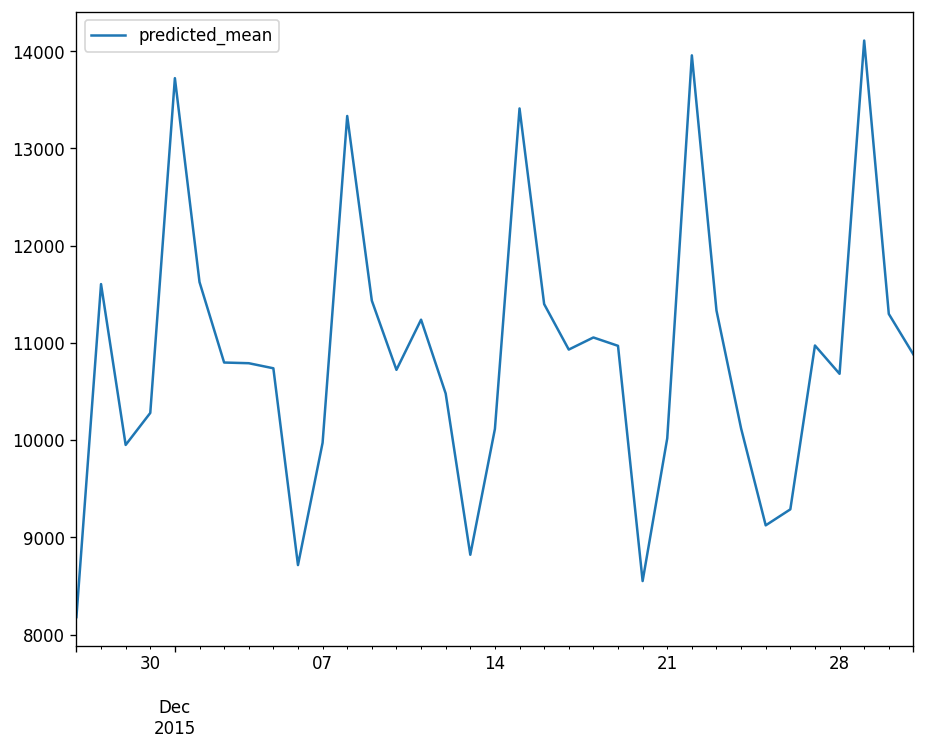

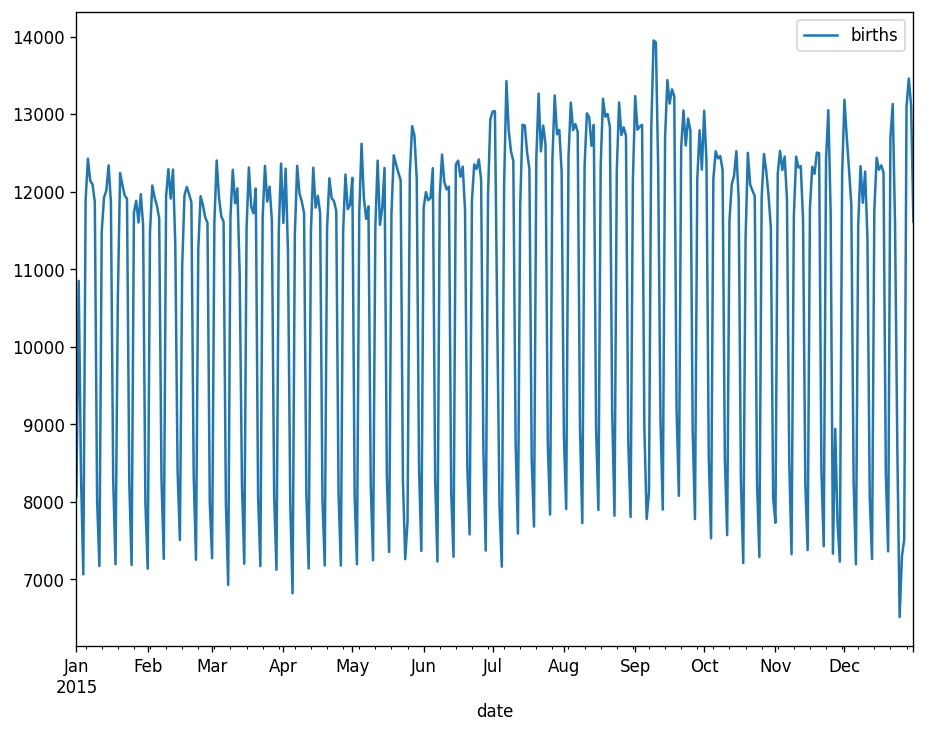

In [61]:
Prediction.plot(legend=True)
data_time.plot(legend=True)